In [87]:
import os
import networkx as nx
from networkx.algorithms import bipartite
import community as community_louvain
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
sns.set_style('whitegrid')
import pandas as pd
import numpy as np

In [31]:
os.getcwd()

'/home/tduricic/Development/workspace/elliot/notebooks'

In [24]:
epinions_ratings_filename = '../data/epinions/processed/ratings.tsv'
def create_ratings_bipartite_graph(filename):
    users = set()
    items = set()
    user_items_dict = {}
    edges = []
    with open(filename) as fr:
        for line in fr.readlines():
            tokens = line.split()
            userId = tokens[0]
            itemId = tokens[1]
            # For now we omit the weight
            # rating = float(tokens[2])

            users.add(userId)
            items.add(itemId)
            edges.append((userId, itemId))
            if userId not in user_items_dict:
                user_items_dict[userId] = []
                user_items_dict[userId].append(itemId)
            else:
                user_items_dict[userId].append(itemId)
    B = nx.Graph()
    B.add_nodes_from(users, bipartite=0)
    B.add_nodes_from(items, bipartite=1)
    B.add_edges_from(edges)

    return B, user_items_dict, users, items

In [25]:
B, user_items_dict, users, items = create_ratings_bipartite_graph(epinions_ratings_filename)

In [26]:
projected_G = bipartite.projected_graph(B, items)

In [167]:
print(len(projected_G.edges))

59782157


In [ ]:
partition = community_louvain.best_partition(projected_G)

In [40]:
partition

{'98639': 0,
 '32163': 1,
 '39877': 2,
 '76874': 3,
 '56947': 2,
 '103220': 4,
 '27540': 1,
 '95563': 5,
 '89754': 0,
 '17714': 1,
 '129981': 2,
 '15354': 1,
 '76685': 3,
 '5811': 3,
 '86589': 2,
 '68974': 2,
 '27501': 3,
 '29896': 6,
 '37292': 2,
 '121342': 4,
 '14740': 7,
 '72161': 2,
 '13148': 3,
 '43193': 1,
 '94386': 4,
 '38404': 0,
 '89595': 2,
 '127799': 2,
 '21033': 7,
 '25261': 3,
 '131780': 21,
 '58621': 0,
 '86444': 2,
 '134884': 4,
 '31167': 0,
 '92033': 3,
 '46757': 2,
 '38171': 2,
 '36810': 0,
 '119834': 4,
 '69183': 2,
 '74025': 4,
 '86653': 0,
 '76084': 2,
 '27164': 3,
 '110617': 2,
 '132679': 4,
 '88269': 4,
 '65676': 3,
 '62452': 9,
 '118461': 0,
 '91679': 1,
 '67733': 3,
 '56840': 3,
 '58154': 2,
 '50740': 2,
 '113728': 3,
 '34684': 1,
 '65499': 4,
 '125719': 2,
 '103286': 4,
 '134679': 3,
 '55285': 2,
 '60779': 3,
 '134348': 2,
 '65965': 3,
 '89498': 4,
 '41052': 2,
 '79348': 2,
 '122260': 2,
 '25033': 0,
 '129172': 7,
 '59618': 4,
 '4174': 1,
 '112752': 4,
 '74693'

In [41]:
community_lists = {}
for key in partition:
    if partition[key] not in community_lists:
        community_lists[partition[key]] = []
        community_lists[partition[key]].append(key)
    else:
        community_lists[partition[key]].append(key)

In [43]:
len(community_lists)

33

In [44]:
community_sizes = {}
for key in community_lists:
    community_sizes[key] = len(community_lists[key])

In [46]:
community_sizes

{0: 12237,
 1: 15702,
 2: 43166,
 3: 24367,
 4: 22819,
 5: 667,
 6: 446,
 7: 6871,
 21: 2055,
 9: 1489,
 10: 1992,
 8: 710,
 13: 1188,
 14: 1399,
 15: 2140,
 16: 30,
 17: 1014,
 18: 680,
 19: 468,
 20: 114,
 22: 9,
 23: 20,
 24: 9,
 26: 10,
 27: 33,
 28: 44,
 29: 7,
 31: 7,
 32: 11,
 11: 17,
 12: 7,
 25: 4,
 30: 6}

In [65]:
community_sizes_list = list(community_sizes.values())

In [66]:
community_sizes_list.sort(reverse=True)

In [67]:
community_sizes_list

[43166,
 24367,
 22819,
 15702,
 12237,
 6871,
 2140,
 2055,
 1992,
 1489,
 1399,
 1188,
 1014,
 710,
 680,
 667,
 468,
 446,
 114,
 44,
 33,
 30,
 20,
 17,
 11,
 10,
 9,
 9,
 7,
 7,
 7,
 6,
 4]

In [54]:
community_ids = range(1, len(community_sizes)+1)

In [68]:
df = pd.DataFrame({"Community id":community_ids, "Community size":community_sizes_list})

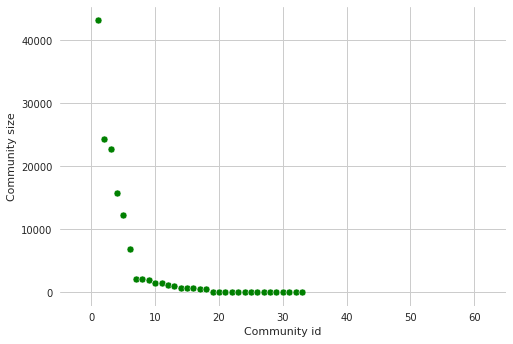

In [71]:
sns.set_style('whitegrid')
ax = sns.scatterplot(data=df, x='Community id', y='Community size', color='green')

ax.set(xlim=(-5, 65))
# ax.set(ylim=(-0.1, 3.2))
# ax.set(xticklabels=['',1,'',10,'',100,'',1000,'',10000])
# ax.set(yticklabels=['',1,'',10,'',100,'',1000])
sns.set(font_scale = 1.5)

# plt.savefig('../plots/community_size_distribution1.pdf', bbox_inches='tight')
plt.show()

In [90]:
user_communities_interactions_dict = {}
for userId in user_items_dict:
    if userId not in user_communities_interactions_dict:
        user_communities_interactions_dict[userId] = [0] * len(community_lists)
    for itemId in user_items_dict[userId]:
        user_communities_interactions_dict[userId][partition[itemId]] += 1

In [95]:
x = np.array(user_communities_interactions_dict['1'])
x

array([58, 32, 46, 61,  9,  0,  0,  9,  0,  0,  7,  0,  0,  1,  2,  4,  0,
        1,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [102]:
np.sum(x/np.max(x))/x.shape[0]

0.11525086934923

In [105]:
user_diversities = {}
for userId in user_communities_interactions_dict:
    user_community_vector = np.array(user_communities_interactions_dict[userId])
    user_diversities[userId] = np.sum(user_community_vector/np.max(user_community_vector))/user_community_vector.shape[0]

<ipython-input-105-57b6bfc6ed53>:4: RuntimeWarning: invalid value encountered in true_divide
  user_diversities[userId] = np.sum(user_community_vector/np.max(user_community_vector))/user_community_vector.shape[0]


In [118]:
x = np.array(user_diversities.values())

array(dict_values([0.11525086934923, 0.12323232323232322, 0.06734006734006734, 0.0800865800865801, 0.052341597796143245, 0.04848484848484848, 0.07092198581560286, 0.06565656565656565, 0.07792207792207793, 0.052341597796143245, 0.0672579453067258, 0.0946969696969697, 0.05785123966942149, 0.0606060606060606, 0.07974481658692185, 0.08446163765312702, 0.030303030303030304, 0.041666666666666664, 0.05113636363636364, 0.06565656565656566, 0.09090909090909091, 0.059705970597059704, 0.05113636363636364, 0.045454545454545456, 0.09354413702239789, 0.06439393939393939, 0.04680468046804681, 0.07770007770007771, 0.0602020202020202, 0.08225108225108224, 0.06117781589479702, 0.06818181818181818, 0.07515151515151516, 0.07954545454545454, 0.030303030303030304, 0.04112554112554113, 0.07196969696969698, 0.061599602583209144, 0.08242424242424241, 0.07636363636363637, 0.05606060606060606, 0.058361391694725026, 0.05898268398268398, 0.07777777777777778, 0.09494949494949495, 0.07621671258034894, 0.084337349397

In [122]:
user_diversities_filtered = {}
for userId in user_diversities:
    if user_diversities[userId] > 0 and user_diversities[userId] <=1:
        user_diversities_filtered[userId] = user_diversities[userId]

In [151]:
user_diversities_df = pd.DataFrame({'userId':list(user_diversities_filtered.keys()), 'diversity':list(user_diversities_filtered.values())})

In [152]:
user_diversities_df

,userId,diversity
0,1,0.115251
1,2,0.123232
2,3,0.067340
3,4,0.080087
4,5,0.052342
...,...,...
32419,49278,0.030303
32420,49279,0.060606
32421,49280,0.060606
32422,49281,0.034632


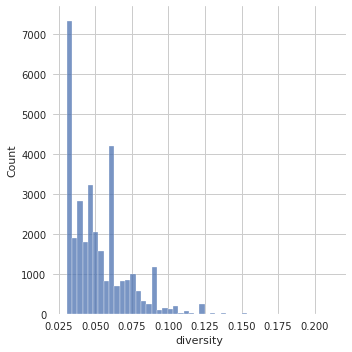

In [156]:
sns.displot(user_diversities_df, x="diversity", bins=50)

In [164]:
source_diversities = []
target_diversities = []
epinions_social_filename = '../data/epinions/processed/social_connections.tsv'
with open(epinions_social_filename) as fr:
        for line in fr.readlines():
            tokens = line.split()
            source_user = tokens[0]
            target_user = tokens[1]
            if source_user in user_diversities_filtered and target_user in user_diversities_filtered:
                source_diversities.append(user_diversities_filtered[source_user])
                target_diversities.append(user_diversities_filtered[target_user])

In [165]:
source_diversities = np.array(source_diversities)
target_diversities = np.array(target_diversities)

In [166]:
from scipy.stats.stats import pearsonr
pearsonr(source_diversities, target_diversities)[0]

0.10205967390057935